In [1]:
!pip install python-sat

In [28]:
from pysat.solvers import Glucose4

import matplotlib.pyplot as plt


In [23]:
def solve_yashi_puzzle(G):
    num_vars = len(G) * len(G[0])  # Total number of variables

    # Step 1: Encode the puzzle constraints
    clauses = []
    for i in range(len(G)):
        for j in range(len(G[i])):
            cell_val = G[i][j]
            if cell_val != 0:
                clauses.append([cell(i, j, cell_val)])

    # Step 2: Encode the row constraints
    for i in range(len(G)):
        row_vars = []
        for j in range(len(G[i])):
            row_vars.append(cell(i, j, 1))
        clauses.append(row_vars)

    # Step 3: Encode the column constraints
    for j in range(len(G[0])):
        col_vars = []
        for i in range(len(G)):
            col_vars.append(cell(i, j, 1))
        clauses.append(col_vars)

    # Step 4: Solve the SAT problem
    solver = Glucose4()
    for clause in clauses:
        solver.add_clause(clause)

    if not solver.solve():
        return "No solution found"

    # Step 5: Extract the solution
    solution = []
    model = solver.get_model()
    for var in range(1, num_vars + 1):
        if var in model:
            i, j, value = cell_info(var)
            if len(solution) <= i:
                solution.append([])
            solution[i].append(value)

    # Step 6: Extract the solution
    solution = []
    model = solver.get_model()
    for var in range(1, num_vars + 1):
        if var in model:
            i, j, value = cell_info(var)
            if len(solution) <= i:
                solution.append([])
            solution[i].append(value)

    return solution

In [24]:
def visualize_puzzle(G, title):
    fig, ax = plt.subplots()
    ax.set_title(title)

    # Plot the unsolved puzzle
    for i in range(len(G)):
        for j in range(len(G[i])):
            if G[i][j] != 0:
                ax.text(j, i, str(G[i][j]), fontsize=14, ha='center', va='center')
            else:
                ax.text(j, i, '', fontsize=14, ha='center', va='center')

    # Adjust the axis labels and grid
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(True, linewidth=1.5, color='black')

    plt.show()

In [25]:
def cell(i, j, val):
    return i * len(G[0]) + j + val

In [26]:
def cell_info(var):
    var -= 1  # Adjusting for 0-based indexing
    i = var // len(G[0])
    j = var % len(G[0])
    val = var % 2 + 1
    return i, j, val

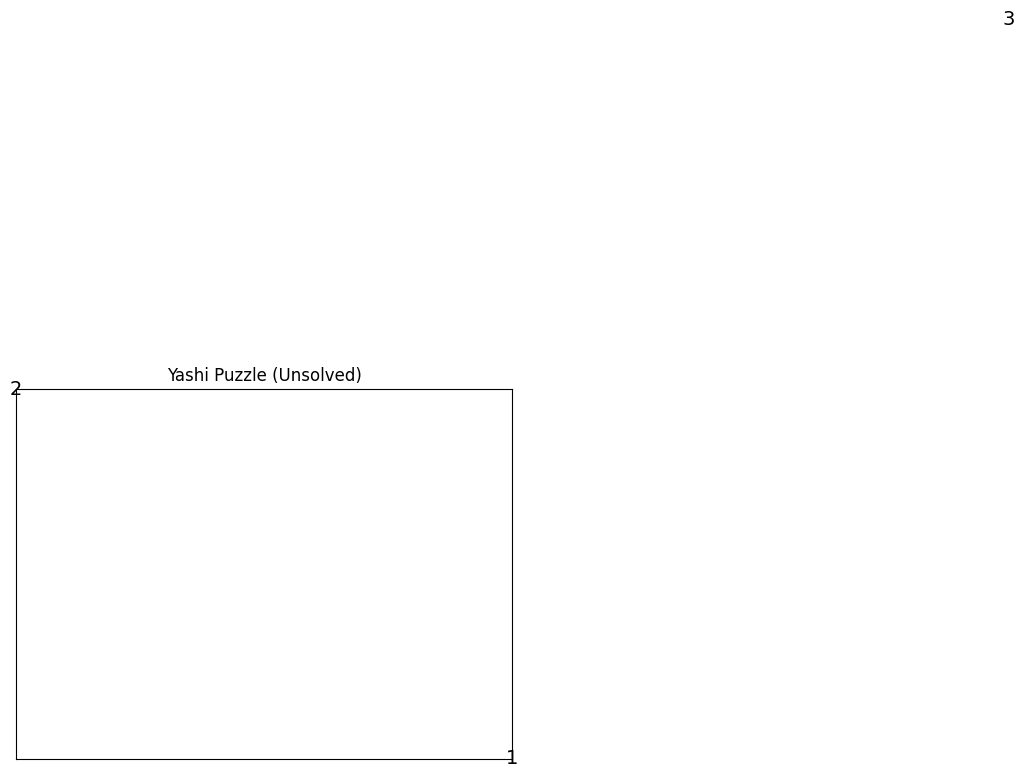

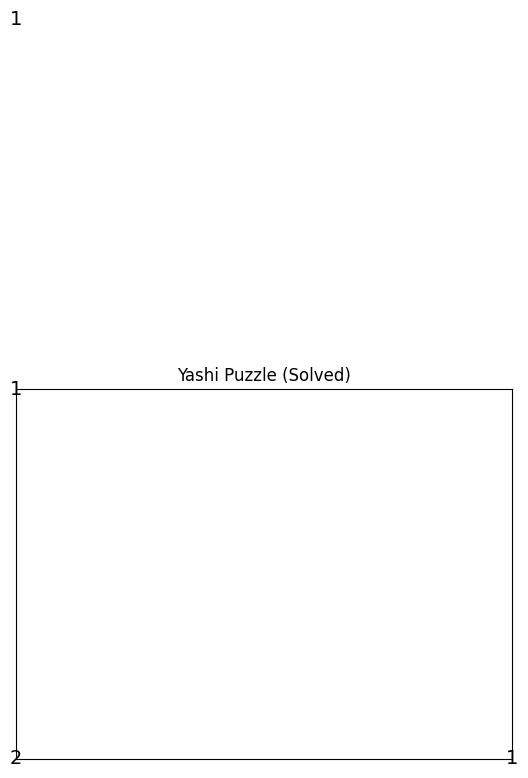

In [29]:
# Example usage
G = [[0, 1, 0],
     [2, 0, 0],
     [0, 0, 3]]

# Visualize the unsolved puzzle
visualize_puzzle(G, 'Yashi Puzzle (Unsolved)')

# Solve the puzzle
solution = solve_yashi_puzzle(G)

# Visualize the solved puzzle
visualize_puzzle(solution, 'Yashi Puzzle (Solved)')